# Bonus topic: Add Adsorbate

## Introduction

In many calculations we use an adsorbate-substrate complex. In the old days, we manually create the location of the adsorbate on top of the substrate (via Excel or by-hand). Now we can use ASE to do this for us. The ASE one is not simple to use, so I created my own wrapper of it. 


## Installation

```bash
pip install git+https://github.com/kimrojas/MatSciToolKit.git
```

## Usage

### Simple case

I have two trajectory/structure file: `nh3.traj` (adsorbate) and `hb.traj` (substrate). Data files available [here](https://github.com/kimrojas/digital-alchemy/tree/main/book/files/qe_tutorial/bonus_add_adsorbate).

Building structure at height: 3.0


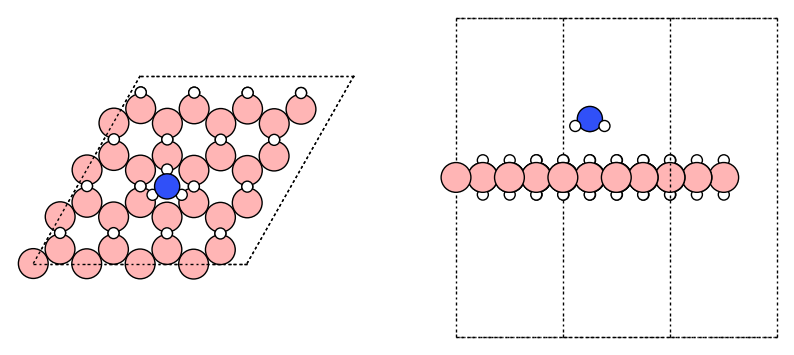

In [1]:
from ase.io import read, write
from matscitoolkit.builder import add_adsorbate
from ase.visualize.plot import plot_atoms
from pathlib import Path
import matplotlib.pyplot as plt

cwd = Path.cwd()
bookdir = list(cwd.parents)[2]
filedir = bookdir / "files/qe_tutorial/bonus_add_adsorbate"


# Load the two structures
adsorbate = read(filedir / "nh3.traj")
substrate = read(filedir / "hb.traj")

# Specify the height
height = 3.

# Add the adsorbate
atm_complex = add_adsorbate(adsorbate, substrate, height, 
                            substrate_reference=[11, 20], # Mid point between substrate atom 11 and 20
                            adsorbate_origin="COG", # Center of geometry of the adsorbate (other opt: `COM` or specific atom index) 
                            adsorbate_rotation=None, # Specify the rotation if needed
                           )

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_atoms(atm_complex, ax[0]);
plot_atoms(atm_complex, ax[1], rotation="-90x");
for iax in ax:
    iax.axis("off")

Building structure at height: 3.0


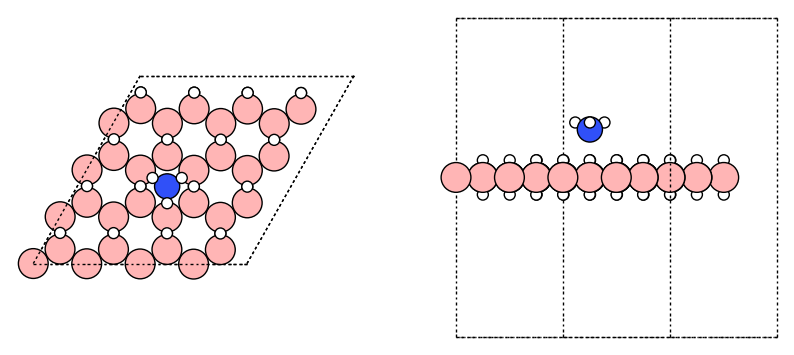

In [2]:
# Add the adsorbate with flip rotation
atm_complex = add_adsorbate(adsorbate, substrate, height, 
                            substrate_reference=[11, 20], # Mid point between substrate atom 11 and 20
                            adsorbate_origin="COG", # Center of geometry of the adsorbate (other opt: `COM` or specific atom index) 
                            adsorbate_rotation=[(180, 'x')], # Specify the rotation if needed
                           )

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_atoms(atm_complex, ax[0]);
plot_atoms(atm_complex, ax[1], rotation="-90x");
for iax in ax:
    iax.axis("off")

## More information

For more information you can visit the [documentation](https://github.com/kimrojas/MatSciToolKit/blob/main/matscitoolkit/builder.py)